In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/project.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe to understand its structure
print(data.head(5))

                        Issuer Company         Article Date  \
0  SBI Cards and Payment Services Ltd   2020-03-04 00:00:00   
1  SBI Cards and Payment Services Ltd   2020-02-26 00:00:00   
2  SBI Cards and Payment Services Ltd   2020-02-22 00:00:00   
3  SBI Cards and Payment Services Ltd   2020-02-21 00:00:00   
4  SBI Cards and Payment Services Ltd   2020-03-06 00:00:00   

                                        News Article   IPO Date  \
0  SBI Cards and Payment Services IPO sailed thro... 2020-03-16   
1  Top lender State Bank of India said the price ... 2020-03-16   
2  The Rs 9,500-crore initial public offering of ... 2020-03-16   
3  The Rs 9,500-crore initial public offering of ... 2020-03-16   
4  SBI Cards and Payment Services, the country's ... 2020-03-16   

                                     paper  
0            Financial Express  New Delhi   
1           The Economic Times; New Delhi   
2           The Economic Times; New Delhi   
3  The Economic Times (Online); New De

In [ ]:
#Convert dates if necessary
data['Article Date'] = pd.to_datetime(data['Article Date'])
data['IPO Date'] = pd.to_datetime(data['IPO Date'])


In [ ]:
data['News Article'][0]

'SBI Cards and Payment Services IPO sailed through at the open of the third day of bidding, led by Qualified Institutional investors stepping up their game on the last day on bidding for the category. With the third day of bidding — the last for all investors except for retail bidders — still to go, SBI Cards’ Rs 10,350-crore IPO was oversubscribed by 70%. India’s fifth largest IPO ever saw a resounding response by investors, who, despite the scare of Coronavirus becoming a pandemic, showed eagerness to bid. Bids were received for Rs 12,792 crore for 10 crore shares on offer by the promoter State Bank of India and PE firm Carlyle Group. With this, SBI Cards IPO is oversubscribed in all categories except for non-institutional high networth investors. The offer was oversubscribed 29 per cent by retail individual investors (RII) by 10:30 AM on Wednesday. RIIs bought 5.5 crore shares against the 4.27 crore that were offered to them. SBI shareholders bought 1.97 crore shares, translating to

In [ ]:
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 Issuer Company    0
Article Date      0
News Article      0
IPO Date          0
paper             0
dtype: int64


In [ ]:
# Install required libraries
!pip install numpy matplotlib seaborn scikit-learn gensim nltk transformers
!pip install clean-text
import numpy as np
import pandas as pd
from transformers import pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import nltk
nltk.download('punkt')
from cleantext import clean
from sklearn.model_selection import cross_val_score
nltk.download('stopwords')
from nltk.corpus import stopwords

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.8 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=fdcd210f37639ef88500fedeaa708569c3ae3ddbe80d1cc99036c5eb21a250ca
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Adjusted preprocessing function
def preprocess_text(text):
    return clean(
        text,
        fix_unicode=True,         # Fix unicode issues
        to_ascii=True,            # Convert to ASCII
        lower=True,               # Convert to lowercase
        no_line_breaks=True,      # Remove line breaks
        no_urls=True,             # Remove URLs
        no_emails=True,           # Remove emails
        no_phone_numbers=True,    # Remove phone numbers
        no_punct=False,           # Keep punctuation as it can be important for context
        replace_with_punct="",    # Replace punctuation with nothing (effectively removes it)
        replace_with_url="",      # Replace URLs with nothing
        replace_with_email="",    # Replace emails with nothing
        replace_with_phone_number="",  # Replace phone numbers with nothing
        replace_with_number="",   # Replace numbers with their original text
        replace_with_digit="",    # Replace digits with their original text
        replace_with_currency_symbol="",  # Replace currency symbols with their original text
        no_currency_symbols=False,  # Keep currency symbols
        no_numbers=False,           # Keep numbers
        no_digits=False             # Keep digits
    )

# Apply the preprocessing function to the 'News Article' column
data['News Article'] = data['News Article'].apply(preprocess_text)


In [ ]:
data['News Article'][0]

"sbi cards and payment services ipo sailed through at the open of the third day of bidding, led by qualified institutional investors stepping up their game on the last day on bidding for the category. with the third day of bidding the last for all investors except for retail bidders still to go, sbi cards' rs 10,350-crore ipo was oversubscribed by 70%. india's fifth largest ipo ever saw a resounding response by investors, who, despite the scare of coronavirus becoming a pandemic, showed eagerness to bid. bids were received for rs 12,792 crore for 10 crore shares on offer by the promoter state bank of india and pe firm carlyle group. with this, sbi cards ipo is oversubscribed in all categories except for non-institutional high networth investors. the offer was oversubscribed 29 per cent by retail individual investors (rii) by 10:30 am on wednesday. riis bought 5.5 crore shares against the 4.27 crore that were offered to them. sbi shareholders bought 1.97 crore shares, translating to 48 

In [ ]:
# Install transformers library

from transformers import BertTokenizer, BertForSequenceClassification


# Load the FinBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
model = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')

# Initialize the sentiment analysis pipeline
finbert = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# Function to split text into chunks ensuring each chunk has a maximum of 510 tokens (accounting for special tokens)
def split_text(text, chunk_size=510):
    tokens = tokenizer.tokenize(text)
    max_chunk_size = chunk_size - 2  # Account for special tokens [CLS] and [SEP]
    chunks = []
    for i in range(0, len(tokens), max_chunk_size):
        chunk_tokens = tokens[i:i + max_chunk_size]
        chunk = tokenizer.convert_tokens_to_string(chunk_tokens)
        chunks.append(chunk)
    return chunks

# Function to get weighted sentiment score and label for long texts
def get_sentiment(text):
    chunks = split_text(text)
    positive_scores = []
    negative_scores = []
    neutral_scores = []
    weights = []
    print(f"Processing text: {text[:50]}...")  # Print the first 50 characters of the text for reference

    for chunk in chunks:
        result = finbert(chunk)[0]
        print(f"Chunk: {chunk[:50]}...\nResult: {result}")  # Debugging statement to check each chunk and result
        label = result['label'].lower()
        score = result['score']

        if label == 'positive':
            positive_scores.append(score * score)  # weight is score squared for stronger influence
            weights.append(score)
        elif label == 'negative':
            negative_scores.append(-score * score)  # weight is score squared for stronger influence
            weights.append(-score)
        elif label == 'neutral':
            neutral_scores.append(score * score)
            weights.append(score)

    if weights:
        total_weight = sum(abs(w) for w in weights)
        final_positive_score = sum(positive_scores) / total_weight if positive_scores else 0
        final_negative_score = sum(negative_scores) / total_weight if negative_scores else 0
        final_neutral_score = sum(neutral_scores) / total_weight if neutral_scores else 0
    else:
        final_positive_score = final_negative_score = final_neutral_score = 0  # No chunks had a positive or negative score

    final_label = 'positive' if final_positive_score > final_negative_score and final_positive_score > final_neutral_score else 'negative' if final_negative_score > final_positive_score and final_negative_score > final_neutral_score else 'neutral'

    # Set final scores based on the final label
    if final_label == 'neutral':
        final_positive_score = final_negative_score = final_neutral_score = 0

    print(f"Text: {text[:50]}...\nPositive Scores: {positive_scores}\nNegative Scores: {negative_scores}\nNeutral Scores: {neutral_scores}\nWeights: {weights}\nFinal Scores -> Positive: {final_positive_score}, Negative: {final_negative_score}, Neutral: {final_neutral_score}\nFinal Label: {final_label}")  # Debugging statement to check scores and final label

    return pd.Series([final_label, final_positive_score if final_label == 'positive' else final_negative_score if final_label == 'negative' else 0])



# Apply sentiment analysis to the news articles
data[['Sentiment_Label', 'Sentiment_Score']] = data['News Article'].apply(get_sentiment)

# Display the first few rows with sentiment labels and scores
print(data[['News Article', 'Sentiment_Label', 'Sentiment_Score']].head())




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

Processing text: sbi cards and payment services ipo sailed through ...
Chunk: sbi cards and payment services ipo sailed through ...
Result: {'label': 'Neutral', 'score': 0.9999016523361206}
Chunk: while today will be the last day for all other inv...
Result: {'label': 'Neutral', 'score': 0.9999083280563354}
Text: sbi cards and payment services ipo sailed through ...
Positive Scores: []
Negative Scores: []
Neutral Scores: [0.9998033143445042, 0.9998166645164162]
Weights: [0.9999016523361206, 0.9999083280563354]
Final Scores -> Positive: 0, Negative: 0, Neutral: 0
Final Label: neutral
Processing text: top lender state bank of india said the price band...
Chunk: top lender state bank of india said the price band...
Result: {'label': 'Neutral', 'score': 0.9999935626983643}
Text: top lender state bank of india said the price band...
Positive Scores: []
Negative Scores: []
Neutral Scores: [0.9999871254381674]
Weights: [0.9999935626983643]
Final Scores -> Positive: 0, Negative: 0, Neutral: 0


In [ ]:
print(data[['News Article', 'Sentiment_Label', 'Sentiment_Score']].head(40))

                                         News Article Sentiment_Label  \
0   sbi cards and payment services ipo sailed thro...         neutral   
1   top lender state bank of india said the price ...         neutral   
2   the rs 9,500-crore initial public offering ofs...         neutral   
3   the rs 9,500-crore initial public offering ofs...         neutral   
4   sbicardsandpaymentservices, the country's seco...         neutral   
5   india's biggest lender state bank of india has...        positive   
6   sbicardsandpaymentservicesipo saw a bumper res...         neutral   
7   sbicardsandpaymentservicesinitial public offer...         neutral   
8   investors braved the jittery markets last week...         neutral   
9   the much-anticipated initial public offering (...        positive   
10  new delhi, march 3 -- the initial public offer...         neutral   
11  new delhi: the mega ipo ofsbicardsandpaymentse...         neutral   
12  new delhi, july 13 -- the initial public offer.

In [ ]:
data.head(40)

,Issuer Company,Article Date,News Article,IPO Date,paper,Sentiment_Label,Sentiment_Score
0,SBI Cards and Payment Services Ltd,2020-03-04,sbi cards and payment services ipo sailed thro...,2020-03-16,Financial Express New Delhi,neutral,0.000000
1,SBI Cards and Payment Services Ltd,2020-02-26,top lender state bank of india said the price ...,2020-03-16,The Economic Times; New Delhi,neutral,0.000000
2,SBI Cards and Payment Services Ltd,2020-02-22,"the rs 9,500-crore initial public offering ofs...",2020-03-16,The Economic Times; New Delhi,neutral,0.000000
3,SBI Cards and Payment Services Ltd,2020-02-21,"the rs 9,500-crore initial public offering ofs...",2020-03-16,The Economic Times (Online); New Delhi,neutral,0.000000
4,SBI Cards and Payment Services Ltd,2020-03-06,"sbicardsandpaymentservices, the country's seco...",2020-03-16,The Economic Times (Online); New Delhi,neutral,0.000000
5,SBI Cards and Payment Services Ltd,2020-02-25,india's biggest lender state bank of india has...,2020-03-16,Financial Express; New Delhi,positive,0.965558
6,SBI Cards and Payment Services Ltd,2020-03-04,sbicardsandpaymentservicesipo saw a bumper res...,2020-03-16,Financial Express; New Delhi,neutral,0.000000
7,SBI Cards and Payment Services Ltd,2020-03-03,sbicardsandpaymentservicesinitial public offer...,2020-03-16,Financial Express; New Delhi,neutral,0.000000
8,SBI Cards and Payment Services Ltd,2020-03-13,investors braved the jittery markets last week...,2020-03-16,Financial Express; New Delhi,neutral,0.000000
9,SBI Cards and Payment Services Ltd,2020-02-26,the much-anticipated initial public offering (...,2020-03-16,Financial Express; New Delhi,positive,0.500009


In [ ]:
data['Sentiment_Label']

0      neutral
1      neutral
2      neutral
3      neutral
4      neutral
        ...   
91     neutral
92    positive
93     neutral
94     neutral
95     neutral
Name: Sentiment_Label, Length: 96, dtype: object

In [ ]:
# Install transformers library
!pip install transformers
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import pandas as pd
import numpy as np

# Load the FinBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
model = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')

# Initialize the sentiment analysis pipeline
finbert = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# Function to split text into chunks ensuring each chunk has a maximum of 510 tokens (accounting for special tokens)
def split_text(text, chunk_size=510):
    tokens = tokenizer.tokenize(text)
    max_chunk_size = chunk_size - 2  # Account for special tokens [CLS] and [SEP]
    chunks = []
    for i in range(0, len(tokens), max_chunk_size):
        chunk_tokens = tokens[i:i + max_chunk_size]
        chunk = tokenizer.convert_tokens_to_string(chunk_tokens)
        chunks.append(chunk)
    return chunks

# Function to get weighted sentiment score and label for long texts
def get_sentiment(text):
    chunks = split_text(text)
    positive_scores = []
    negative_scores = []
    neutral_scores = []
    weights = []
    print(f"Processing text: {text[:50]}...")  # Print the first 50 characters of the text for reference

    for chunk in chunks:
        result = finbert(chunk)[0]
        print(f"Chunk: {chunk[:50]}...\nResult: {result}")  # Debugging statement to check each chunk and result
        label = result['label'].lower()
        score = result['score']

        if label == 'positive':
            positive_scores.append(score * score)  # weight is score squared for stronger influence
            weights.append(score)
        elif label == 'negative':
            negative_scores.append(-score * score)  # weight is score squared for stronger influence
            weights.append(-score)
        elif label == 'neutral':
            neutral_scores.append(score * score)
            weights.append(score)

    if weights:
        total_weight = sum(abs(w) for w in weights)
        final_positive_score = sum(positive_scores) / total_weight if positive_scores else 0
        final_negative_score = sum(negative_scores) / total_weight if negative_scores else 0
        final_neutral_score = sum(neutral_scores) / total_weight if neutral_scores else 0
    else:
        final_positive_score = final_negative_score = final_neutral_score = 0  # No chunks had a positive or negative score

    final_label = 'positive' if final_positive_score > final_negative_score and final_positive_score > final_neutral_score else 'negative' if final_negative_score > final_positive_score and final_negative_score > final_neutral_score else 'neutral'

    # Set final scores based on the final label
    if final_label == 'neutral':
        final_positive_score = final_negative_score = final_neutral_score = 0

    print(f"Text: {text[:50]}...\nPositive Scores: {positive_scores}\nNegative Scores: {negative_scores}\nNeutral Scores: {neutral_scores}\nWeights: {weights}\nFinal Scores -> Positive: {final_positive_score}, Negative: {final_negative_score}, Neutral: {final_neutral_score}\nFinal Label: {final_label}")  # Debugging statement to check scores and final label

    return pd.Series([final_label, final_positive_score if final_label == 'positive' else final_negative_score if final_label == 'negative' else 0])


# Apply sentiment analysis to the news articles
data[['Sentiment_Label', 'Sentiment_Score']] = data['News Article'].apply(get_sentiment)

# Calculate average sentiment score for each company
average_scores = data.groupby('Issuer Company')['Sentiment_Score'].mean().reset_index()

# Display the average scores
print(average_scores)




Processing text: sbi cards and payment services ipo sailed through ...
Chunk: sbi cards and payment services ipo sailed through ...
Result: {'label': 'Neutral', 'score': 0.9999016523361206}
Chunk: while today will be the last day for all other inv...
Result: {'label': 'Neutral', 'score': 0.9999083280563354}
Text: sbi cards and payment services ipo sailed through ...
Positive Scores: []
Negative Scores: []
Neutral Scores: [0.9998033143445042, 0.9998166645164162]
Weights: [0.9999016523361206, 0.9999083280563354]
Final Scores -> Positive: 0, Negative: 0, Neutral: 0
Final Label: neutral
Processing text: top lender state bank of india said the price band...
Chunk: top lender state bank of india said the price band...
Result: {'label': 'Neutral', 'score': 0.9999935626983643}
Text: top lender state bank of india said the price band...
Positive Scores: []
Negative Scores: []
Neutral Scores: [0.9999871254381674]
Weights: [0.9999935626983643]
Final Scores -> Positive: 0, Negative: 0, Neutral: 0


In [ ]:
# Check the distribution of sentiment labels
label_distribution = data['Sentiment_Label'].value_counts()
print("Sentiment Label Distribution:\n", label_distribution)

# Display a random sample of 40 rows to get a better mix of sentiments
random_sample = data.sample(40)
print("\nRandom Sample of 40 Rows:\n", random_sample[['News Article', 'Sentiment_Label', 'Sentiment_Score']])

# Display all rows with negative sentiment
negative_rows = data[data['Sentiment_Label'] == 'negative']
print("\nAll Rows with Negative Sentiment:\n", negative_rows[['News Article', 'Sentiment_Label', 'Sentiment_Score']])

# Display the first 40 rows to compare with previous results
print("\nFirst 40 Rows of the DataFrame:\n", data.head(40)[['News Article', 'Sentiment_Label', 'Sentiment_Score']])


Sentiment Label Distribution:
 Sentiment_Label
neutral     65
positive    31
Name: count, dtype: int64

Random Sample of 40 Rows:
                                          News Article Sentiment_Label  \
64  mumbai, oct. 22 -- initial public offer of equ...         neutral   
30  new delhi: the rs 600 crore ipo by route mobil...        positive   
70  adding to the list of initial public offerings...         neutral   
84  new delhi: indigo paints' initial public offer...        positive   
8   investors braved the jittery markets last week...         neutral   
31  the initial public offer (ipo) of cloud commun...         neutral   
12  new delhi, july 13 -- the initial public offer...         neutral   
86  new delhi: indigo paints, whose ipo attracted ...         neutral   
24  it consulting and software firm happiest minds...         neutral   
27  new delhi, sept. 16 -- the allotment of shares...         neutral   
55  new delhi: mazagon dock shipbuilders on thursd...         neut

In [ ]:
# Install transformers library
!pip install transformers
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import pandas as pd
import numpy as np

# Load the FinBERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
model = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')

# Initialize the sentiment analysis pipeline
finbert = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

# Function to split text into chunks ensuring each chunk has a maximum of 510 tokens (accounting for special tokens)
def split_text(text, chunk_size=510):
    tokens = tokenizer.tokenize(text)
    max_chunk_size = chunk_size - 2  # Account for special tokens [CLS] and [SEP]
    chunks = []
    for i in range(0, len(tokens), max_chunk_size):
        chunk_tokens = tokens[i:i + max_chunk_size]
        chunk = tokenizer.convert_tokens_to_string(chunk_tokens)
        chunks.append(chunk)
    return chunks

# Function to get weighted sentiment score and label for long texts
def get_sentiment(text):
    chunks = split_text(text)
    positive_scores = []
    negative_scores = []
    neutral_scores = []
    weights = []

    for chunk in chunks:
        result = finbert(chunk)[0]
        label = result['label'].lower()
        score = result['score']

        if label == 'positive':
            positive_scores.append(score * score)  # weight is score squared for stronger influence
            weights.append(score)
        elif label == 'negative':
            negative_scores.append(-score * score)  # weight is score squared for stronger influence
            weights.append(-score)
        elif label == 'neutral':
            neutral_scores.append(score * score)
            weights.append(score)

    if weights:
        total_weight = sum(abs(w) for w in weights)
        final_positive_score = sum(positive_scores) / total_weight if positive_scores else 0
        final_negative_score = sum(negative_scores) / total_weight if negative_scores else 0
        final_neutral_score = sum(neutral_scores) / total_weight if neutral_scores else 0
    else:
        final_positive_score = final_negative_score = final_neutral_score = 0  # No chunks had a positive or negative score

    final_label = 'positive' if final_positive_score > final_negative_score and final_positive_score > final_neutral_score else 'negative' if final_negative_score > final_positive_score and final_negative_score > final_neutral_score else 'neutral'

    # Set final scores based on the final label
    if final_label == 'neutral':
        final_positive_score = final_negative_score = final_neutral_score = 0

    return pd.Series([final_label, final_positive_score if final_label == 'positive' else final_negative_score if final_label == 'negative' else 0])

# Apply sentiment analysis to the news articles
data[['Sentiment_Label', 'Sentiment_Score']] = data['News Article'].apply(get_sentiment)

# Calculate average sentiment score and determine overall sentiment for each company
def determine_overall_sentiment(scores):
    avg_score = scores.mean()
    if avg_score > 0.05:
        return 'positive', avg_score
    elif avg_score < -0.05:
        return 'negative', avg_score
    else:
        return 'neutral', avg_score

# Group by company and aggregate sentiment scores
company_sentiment = data.groupby('Issuer Company')['Sentiment_Score'].apply(determine_overall_sentiment).reset_index()
company_sentiment[['Overall_Sentiment', 'Average_Score']] = pd.DataFrame(company_sentiment['Sentiment_Score'].tolist(), index=company_sentiment.index)
company_sentiment = company_sentiment.drop(columns=['Sentiment_Score'])

# Display the aggregated sentiment for each company
print(company_sentiment)

# Save the results to a new file
#company_sentiment.to_excel('/mnt/data/aggregated_sentiment_scores.xlsx', index=False)
#print("Aggregated sentiment analysis complete. Results saved to 'aggregated_sentiment_scores.xlsx'.")


                                Issuer Company Overall_Sentiment  \
0        Chemcon Speciality Chemicals Limited           positive   
1              Equitas Small Finance Bank Ltd           positive   
2             Happiest Minds Technologies Ltd           positive   
3  Indian Railway Finance Corporation Limited            neutral   
4                       Indigo Paints Limited           positive   
5                 Likhitha Infrastructure Ltd            neutral   
6           Mazagon Dock Shipbuilders Limited           positive   
7                         Rossari Biotech Ltd           positive   
8                            Route Mobile Ltd           positive   
9          SBI Cards and Payment Services Ltd           positive   

   Average_Score  
0       0.356859  
1       0.074702  
2       0.248430  
3       0.000000  
4       0.389314  
5       0.000000  
6       0.273268  
7       0.213045  
8       0.287292  
9       0.122131  


<ipython-input-16-f91e8f0502db>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=company_sentiment, x='Overall_Sentiment', palette='viridis')


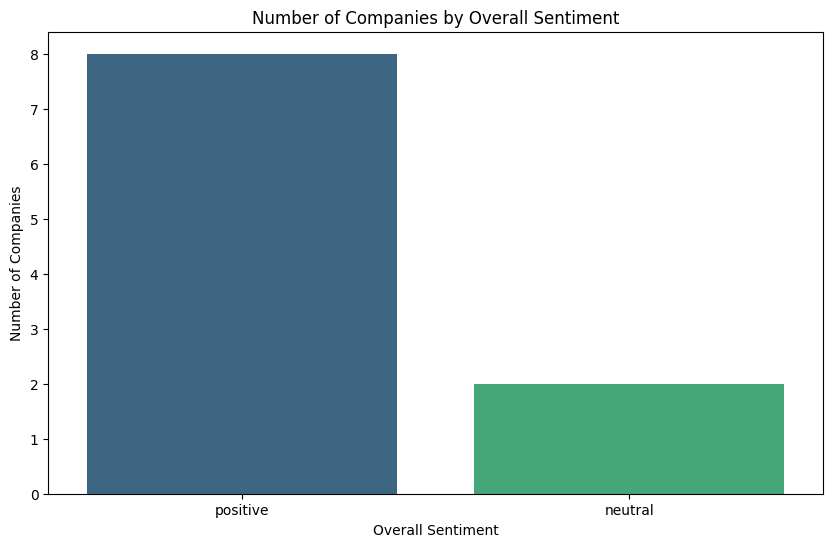

<ipython-input-16-f91e8f0502db>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=company_sentiment, x='Overall_Sentiment', y='Average_Score', palette='viridis')


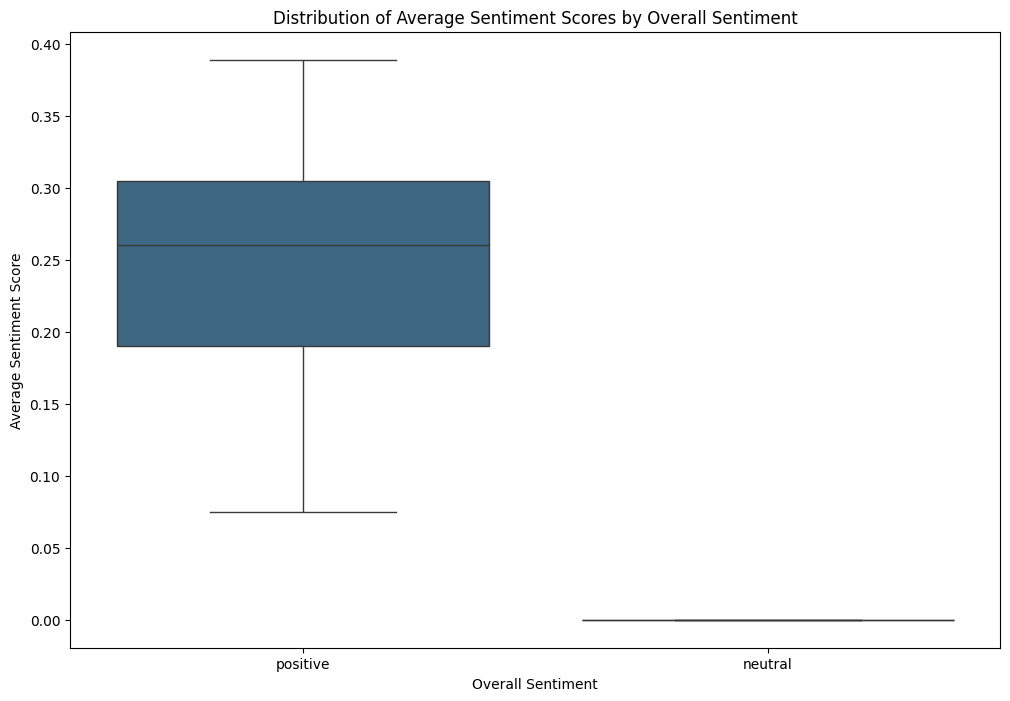

<ipython-input-16-f91e8f0502db>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_scores_by_sentiment, x='Overall_Sentiment', y='Average_Score', palette='viridis')


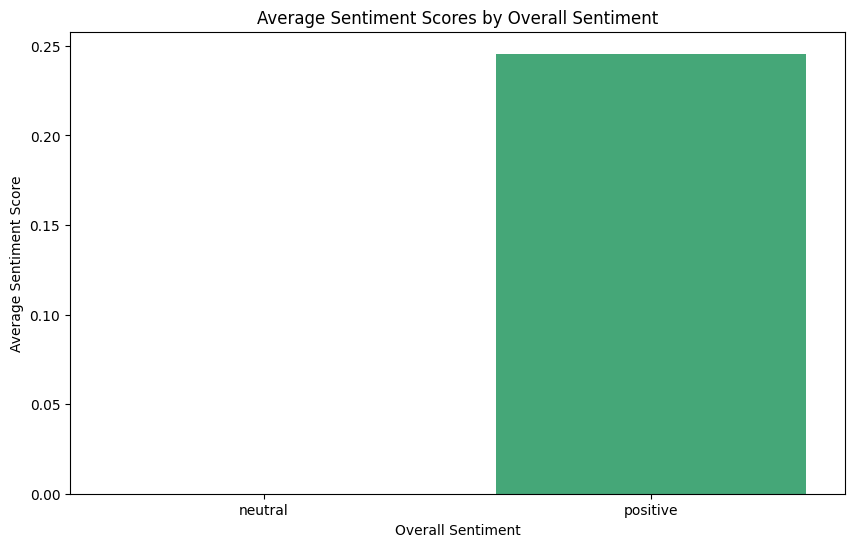

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'company_sentiment' DataFrame is already available
# Visualization of the number of companies by overall sentiment
plt.figure(figsize=(10, 6))
sns.countplot(data=company_sentiment, x='Overall_Sentiment', palette='viridis')
plt.title('Number of Companies by Overall Sentiment')
plt.xlabel('Overall Sentiment')
plt.ylabel('Number of Companies')
plt.show()

# Visualization of the average sentiment scores
plt.figure(figsize=(12, 8))
sns.boxplot(data=company_sentiment, x='Overall_Sentiment', y='Average_Score', palette='viridis')
plt.title('Distribution of Average Sentiment Scores by Overall Sentiment')
plt.xlabel('Overall Sentiment')
plt.ylabel('Average Sentiment Score')
plt.show()

# Additional bar plot for average scores by sentiment
avg_scores_by_sentiment = company_sentiment.groupby('Overall_Sentiment')['Average_Score'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_scores_by_sentiment, x='Overall_Sentiment', y='Average_Score', palette='viridis')
plt.title('Average Sentiment Scores by Overall Sentiment')
plt.xlabel('Overall Sentiment')
plt.ylabel('Average Sentiment Score')
plt.show()
